<a href="https://colab.research.google.com/github/MuhammadSadiq1996/PIAICAssignments/blob/main/Concrete_Strength_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Assignment: Compresive Strength Concrete Problem
# Abstract:

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.


**Data Set Characteristics:** 

Multivariate

**Number of Instances:**

1030

**Area:**

Physical

**Attribute Characteristics:**

Real

**Number of Attributes:**

9

**Date Donated**

2007-08-03

**Associated Tasks:**

Regression

**Missing Values?**

N/A

**Number of Web Hits:**

231464

**Description:**
**Features Name	Data Type	Measurement	Description**
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable Water (component 4) | quantitative | kg in a m3 mixture | Input Variable Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable Age | quantitative | Day (1~365) | Input Variable Concrete compressive strength | quantitative | MPa | Output Variable

**WORKFLOW :**
Load Data
Check Missing Values ( If Exist ; Fill each record with mean of its feature )
Standardized the Input Variables. Hint: Centeralized the data
Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
Train the Model with Epochs (100) and validate it
If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
Evaluation Step
Prediction

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers , optimizers

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df= pd.read_csv("/content/gdrive/MyDrive/DL PIAIC/compresive_strength_concrete.csv")

In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [6]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [8]:
df.keys()# to gets columns name

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [9]:
# split dataframe into input and output
data=df.iloc[:,:8]

targets=df.iloc[:,-1]

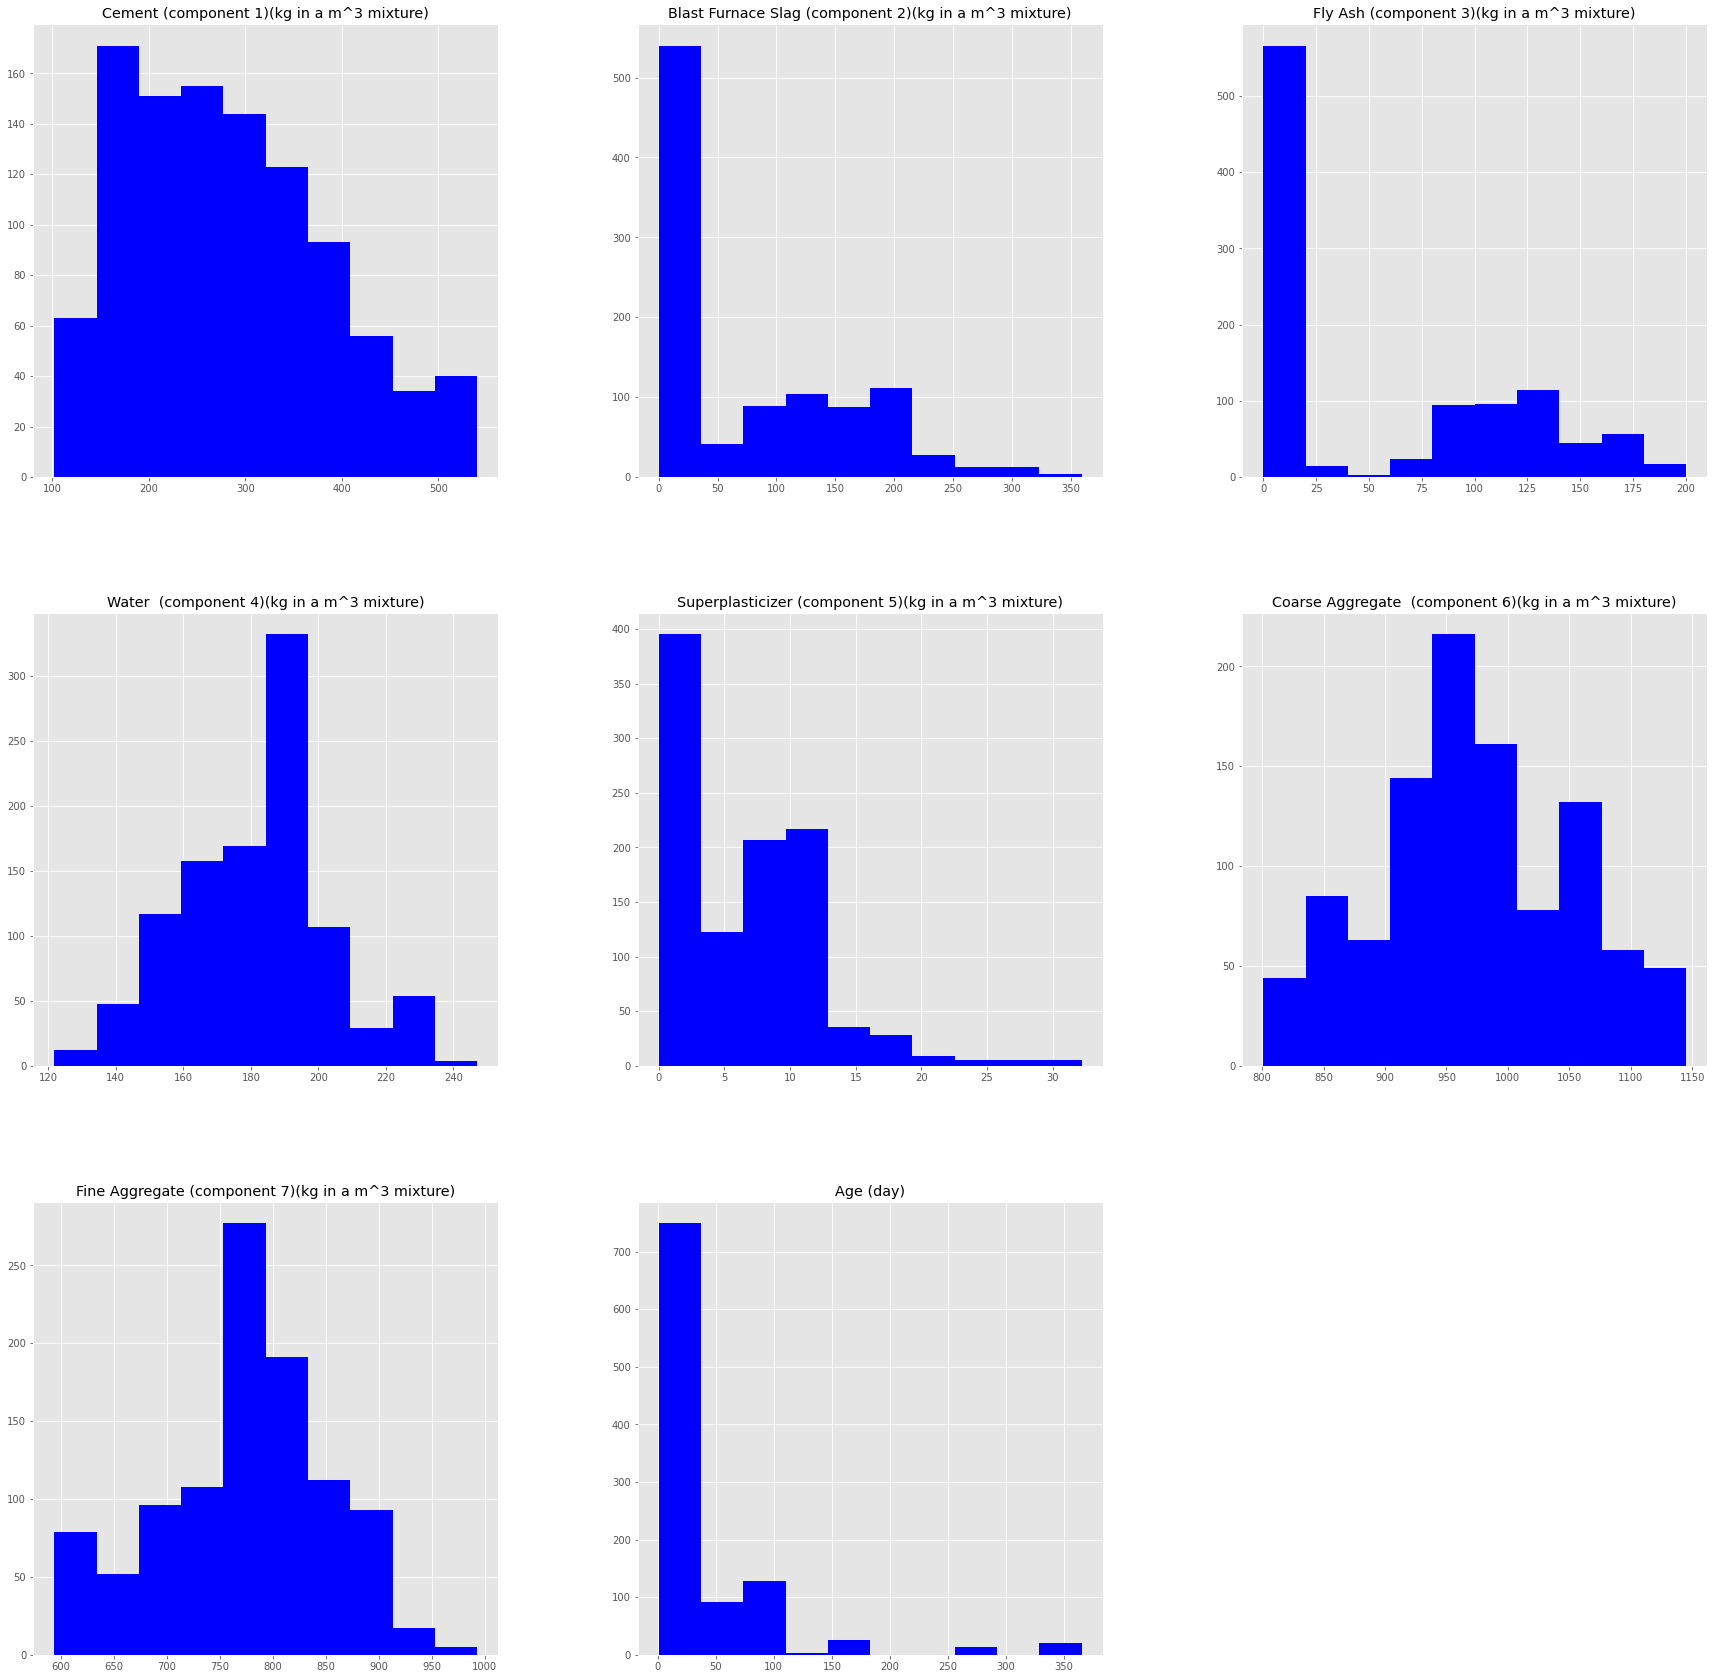

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.DataFrame.hist(data, figsize = [30,30], color="Blue")
plt.show()

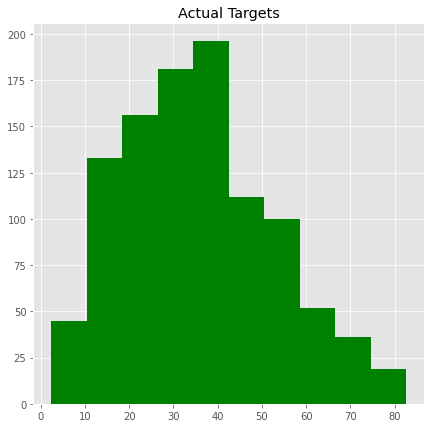

In [11]:
plt.style.use('ggplot')
targets.hist( figsize = [7,7], color="Green")
plt.title("Actual Targets")
plt.show()

In [23]:
# standardized or normalized the data (input variables)
mean = data.mean(axis=0)
data-= mean
std = data.std(axis=0)
data/= std

In [24]:
# data spliting using machine learning spliting method
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,targets,random_state=0)

In [25]:
print(f"Shape of training data :{X_train.shape},\nShape of training targets:{y_train.shape}")

Shape of training data :(772, 8),
Shape of training targets:(772,)


In [26]:
print(f"Shape of testing data :{X_test.shape},\nShape of testing targets:{y_test.shape}")

Shape of testing data :(258, 8),
Shape of testing targets:(258,)


In [27]:
X_train= np.asarray(X_train).astype('float32')
X_test= np.asarray(X_test).astype('float32')

In [29]:
val_X = X_train[:230]
partial_X_train=X_train[230:]
val_y=y_train[:230]
partial_y_train=y_train[230:]

In [16]:
from keras import models, layers , optimizers

In [30]:
network=models.Sequential()
network.add(tf.keras.layers.Dense(10,activation="relu",input_shape=(X_train.shape[1],)))
network.add(tf.keras.layers.Dense(8,activation="relu"))
network.add(tf.keras.layers.Dense(1))

In [31]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


In [32]:
network.compile(optimizer=optimizers.RMSprop(lr=0.001), loss="mse",metrics=['mae'])

In [33]:
history=network.fit(partial_X_train,partial_y_train,epochs=10,validation_data=(val_X,val_y),batch_size=1,verbose=1)

Epoch 1/10
542/542 [==============================] - 2s 2ms/step - loss: 1595.8019 - mae: 35.5748 - val_loss: 1126.5902 - val_mae: 29.3655
Epoch 2/10
542/542 [==============================] - 1s 1ms/step - loss: 883.3345 - mae: 24.9539 - val_loss: 389.3777 - val_mae: 15.4837
Epoch 3/10
542/542 [==============================] - 1s 1ms/step - loss: 269.9077 - mae: 12.8100 - val_loss: 239.5419 - val_mae: 12.4879
Epoch 4/10
542/542 [==============================] - 1s 1ms/step - loss: 185.3388 - mae: 11.0295 - val_loss: 211.5071 - val_mae: 11.6627
Epoch 5/10
542/542 [==============================] - 1s 1ms/step - loss: 164.6306 - mae: 10.1973 - val_loss: 192.2459 - val_mae: 11.0485
Epoch 6/10
542/542 [==============================] - 1s 1ms/step - loss: 172.1263 - mae: 10.4536 - val_loss: 177.1160 - val_mae: 10.5494
Epoch 7/10
542/542 [==============================] - 1s 1ms/step - loss: 159.5647 - mae: 9.8816 - val_loss: 166.7413 - val_mae: 10.2671
Epoch 8/10
542/542 [=============

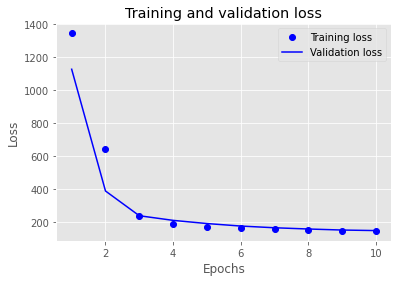

In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
all_mae_histories=[]
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)
print(all_mae_histories)

[[29.36551856994629, 15.483671188354492, 12.487884521484375, 11.662674903869629, 11.048521041870117, 10.549383163452148, 10.267111778259277, 9.882917404174805, 9.729734420776367, 9.6632719039917]]


In [36]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(2)]
print(average_mae_history)

[29.36551856994629, 15.483671188354492]


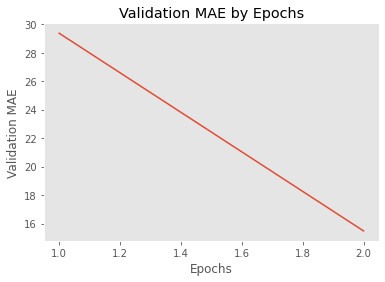

In [37]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.title('Validation MAE by Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.grid()
plt.show()

In [38]:
test_mse_score, test_mae_score = network.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 127.7986 - mae: 8.9949


In [ ]:
test_mae_score

9.185037612915039

In [39]:
y_pred = network.predict(X_test)
y_pred

array([[39.29067 ],
       [14.466682],
       [60.268047],
       [41.73733 ],
       [21.052551],
       [56.99988 ],
       [49.726974],
       [27.796223],
       [53.982597],
       [44.49691 ],
       [20.768335],
       [42.198475],
       [22.807808],
       [26.678114],
       [48.327007],
       [53.69919 ],
       [32.56353 ],
       [24.591908],
       [49.8493  ],
       [27.408522],
       [45.363262],
       [35.699238],
       [29.739264],
       [49.382595],
       [21.921211],
       [22.157589],
       [85.93276 ],
       [26.30022 ],
       [53.69919 ],
       [48.787033],
       [19.374321],
       [37.55407 ],
       [15.785742],
       [26.268318],
       [24.87288 ],
       [13.55472 ],
       [56.425636],
       [24.479334],
       [24.756046],
       [24.109943],
       [47.10274 ],
       [29.684906],
       [26.691711],
       [30.984127],
       [53.124767],
       [52.326294],
       [28.244003],
       [43.299107],
       [36.526775],
       [73.45518 ],


In [40]:
y_test

747    26.06
718    10.35
175    79.30
828    74.99
713     9.69
       ...  
453    31.72
906    39.42
757    18.13
875    18.28
62      9.87
Name: Concrete compressive strength(MPa, megapascals) , Length: 258, dtype: float64

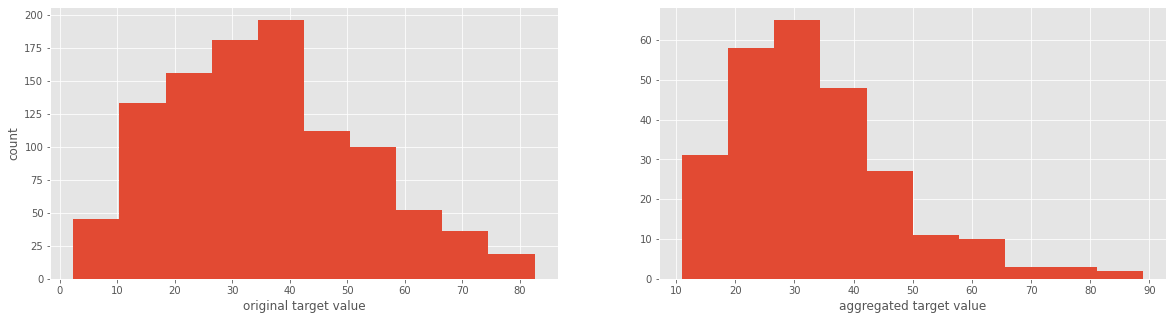

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(targets)
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(y_pred)
plt.xlabel('aggregated target value')
plt.show()